In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# AND Gate
<img height="240px" width="320px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/AND_ANSI.svg/1920px-AND_ANSI.svg.png">

In [3]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])
pd.DataFrame(np.c_[X, y], columns='X Y Z'.split())

,X,Y,Z
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


![](images/ANDand.png)

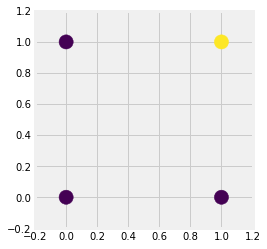

In [8]:
plt.scatter(*X.T, c=y, s=200)
_ = plt.axis([-0.2, 1.2, -0.2, 1.2])
plt.gca().set_aspect('equal')

In [9]:
AND_weight = np.array([1, 1]).reshape(-1, 1)
AND_bias = -1.5

z = np.dot(X, AND_weight) + AND_bias
y_hat = sigmoid(z)
print(y_hat > 0.5)

[[False]
 [False]
 [False]
 [ True]]


# OR Gate
<img height="240px" width="320px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/OR_ANSI_Labelled.svg/1920px-OR_ANSI_Labelled.svg.png">

In [10]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])
pd.DataFrame(np.c_[X, y], columns='X Y Z'.split())

,X,Y,Z
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


![](images/or.png)

In [7]:
OR_weight = np.array([1, 1]).reshape(-1, 1)
OR_bias = -0.5


[[False]
 [ True]
 [ True]
 [ True]]


### Exercise: Compute the activations for the AND gate, with the weights provided.

In [ ]:
# enter code here
print(y_hat > 0.5)

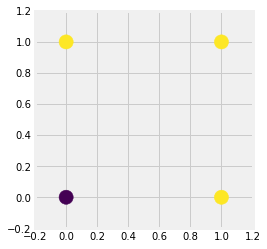

In [11]:
plt.scatter(*X.T, c=y, s=200)
_ = plt.axis([-0.2, 1.2, -0.2, 1.2])
plt.gca().set_aspect('equal')

# NAND Gate
<img height="240px" width="320px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/NAND_ANSI_Labelled.svg/1920px-NAND_ANSI_Labelled.svg.png">

In [12]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([1, 1, 1, 0])
pd.DataFrame(np.c_[X, y], columns='X Y Z'.split())

,X,Y,Z
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


![](images/nand.png)

In [10]:
NAND_weight = np.array([-1, -1]).reshape(-1, 1)
NAND_bias = 1.5

z = np.dot(X, NAND_weight) + NAND_bias
y_hat = sigmoid(z)
print(y_hat > 0.5)

[[ True]
 [ True]
 [ True]
 [False]]


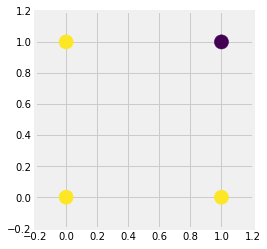

In [13]:
plt.scatter(*X.T, c=y, s=200)
_ = plt.axis([-0.2, 1.2, -0.2, 1.2])
plt.gca().set_aspect('equal')

# Putting it all together - XOR Gate

In [14]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])
pd.DataFrame(np.c_[X, y], columns='X Y Z'.split())

,X,Y,Z
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


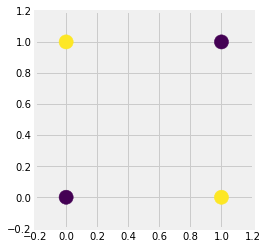

In [15]:
plt.scatter(*X.T, c=y, s=200)
_ = plt.axis([-0.2, 1.2, -0.2, 1.2])
plt.gca().set_aspect('equal')

![](images/combo.png)

![](images/xor.png)

In [12]:
sigmoid(np.dot(sigmoid(np.dot(X, np.c_[NAND_weight, OR_weight]) + np.tile(np.array([NAND_bias, OR_bias]), (4, 1))) > 0.5, AND_weight) + AND_bias) > 0.5

array([[False],
       [ True],
       [ True],
       [False]])